## Project: Diabetic Retinopathy using openCV and CNN with Mirrored Strategy.

Diabetic retinopathy is an eye disease caused by the high blood sugar from diabetes. In this project we have samples of eyes images. Our task is to automate the detection using openCV and CNN methods. And then finally train with Mirrored Strategy. In real world this could act as second help to doctors.

<b>About the dataset</b>: Dataset contains images of total of 1427 images and each image has the diabetic retinopathy rating on a scale of 0 to 4. So we have total of 5 class.

  

### 1: Download and preprocess the dataset to correct for noise and under and over exposure.

In [ ]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import cv2
import os

Next task is to load the data. We will load the data from dropbox using magical method of `!wget`. 

In [ ]:
# Load the data 
!wget https://www.dropbox.com/sh/7z7xq2lq3ogspcv/AABMgQwzRE8GVKb6HYGWCgrfa/dataset?dl=0&subfolder_nav_tracking=1

--2022-02-03 18:13:40--  https://www.dropbox.com/sh/7z7xq2lq3ogspcv/AABMgQwzRE8GVKb6HYGWCgrfa/dataset?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/7z7xq2lq3ogspcv/AABMgQwzRE8GVKb6HYGWCgrfa/dataset [following]
--2022-02-03 18:13:40--  https://www.dropbox.com/sh/raw/7z7xq2lq3ogspcv/AABMgQwzRE8GVKb6HYGWCgrfa/dataset
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce30a5a601093ad0629a41336b5.dl.dropboxusercontent.com/zip_download_get/BCbq756UeFPuefg-uG3cE7HvIKygjHyl7GyVpgYFh1jQAkboVdxI0F4egwtKHKDwxcXwAT6YeIl0BhznCAeKHh4bVNp_psCfJHkk5GFz562S3w# [following]
--2022-02-03 18:13:41--  https://uce30a5a601093ad0629a41336b5.dl.dropboxusercontent.com/zip_download_get/BCbq756UeFPuefg-uG3cE7HvIKygjHyl7GyVpgYFh1jQAkboVdxI0

**Extracting the dataset.** <br/> 
Next task is to extract the dataset. For this we will use *zipfile* library. 

In [ ]:
import zipfile 
zip_ref = zipfile.ZipFile("/content/dataset?dl=0")
zip_ref.extractall(path="dataset/")
zip_ref.close()

In [ ]:
# Checking the number of total files 
len(os.listdir("dataset/"))

1427

So, we have total of 1427 image files. Let's make a function to see the random images out of these 1427 images.  

In [ ]:
import random
def view_random_image(target_folder="dataset/"):
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    
    # Read in the iamage
    img = mpimg.imread(target_folder +random_image[0])
    plt.imshow(img)
    plt.axis("off");
    plt.title(os.listdir())
    print(f"Image shape:{img.shape}") # Show the shape of image
    return img

['9063_left.jpeg']
Image shape:(3168, 4752, 3)


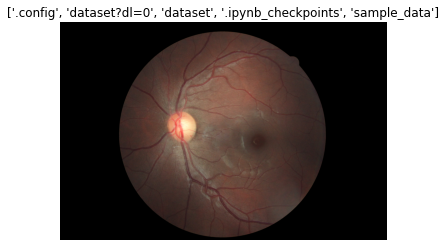

In [ ]:
img = view_random_image()

['8593_left.jpeg']
Image shape:(2304, 3456, 3)


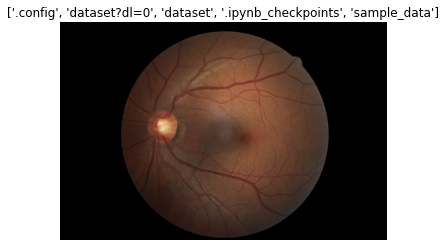

In [ ]:
# Checking for another image
img  = view_random_image()

Looking on these images looks like our data is **underexposed**. So we will check and see whether CLAHE 
<i>(Contrast limited adaptive histogram equalization) </i> works for these images or not.

CLAHE histogram is type of histogram equalization. Histogram equlization increases the contrast for better proceessing of image especially when the images are underexpose and since our image is underexpose, histogram equalization will help.

Let's make a function to apply CLAHE histogram equalization. We will use openCV `createCLAHE` for this.

In [ ]:
def clae_hist(img):
  img = cv2.imread(img)
  hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  h,s,v = hsv_img[:,:,0], hsv_img[:,:,1] , hsv_img[:,:,2]
  clae = cv2.createCLAHE(clipLimit=10.0,tileGridSize=(8,8))
  v = clae.apply(v)
  hsv_img  = np.dstack((h,s,v))
  rgb =cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)
  return plt.imshow(rgb)

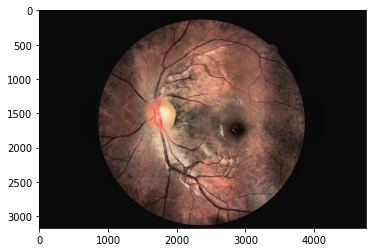

In [ ]:
clae_hist("dataset/9063_left.jpeg")

Looks like there has been some improvement in it. Checking this improvement by comparing in more images. 

Text(0.5, 1.0, 'CLAE histogram Equalized Image:9382_left.jpeg')

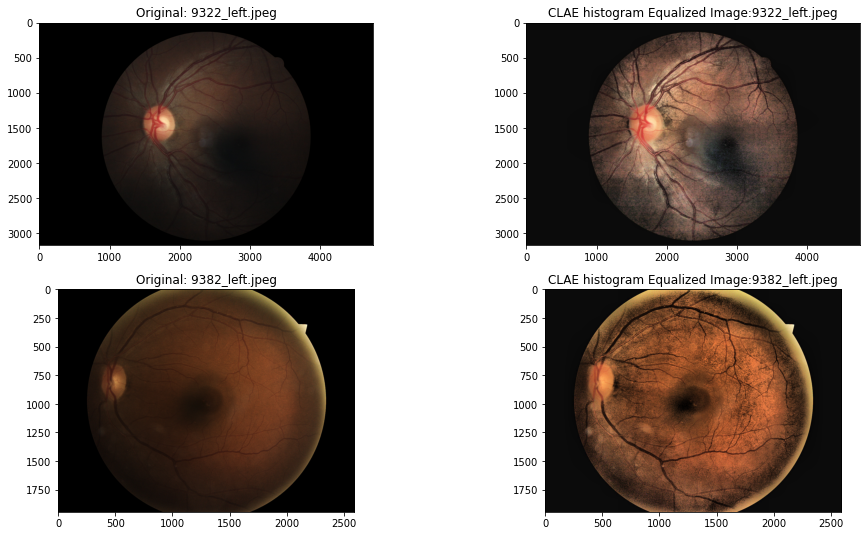

In [ ]:
# Display the images by compaing it to its original image
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
img_1 = mpimg.imread("dataset/9322_left.jpeg")
plt.imshow(img_1)
plt.title("Original: 9322_left.jpeg")


plt.subplot(2,2,2)
clae_hist("dataset/9322_left.jpeg")
plt.title("CLAE histogram Equalized Image:9322_left.jpeg")

plt.subplot(2,2,3)
img_2 = mpimg.imread("dataset/9382_left.jpeg")
plt.imshow(img_2)
plt.title("Original: 9382_left.jpeg")


plt.subplot(2,2,4)
clae_hist("dataset/9382_left.jpeg")
plt.title("CLAE histogram Equalized Image:9382_left.jpeg")


So, from the images it is evident that CLAHE historgam equalization will take care of underexposing. So apply the CLAHE histogram and save it.

In [ ]:
def clahe_hist_equalize(folder_name="dataset/"):
    list_file = os.listdir(folder_name)
    for i in list_file:
        img = cv2.imread(folder_name+i)
        hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        h,s,v = hsv_img[:,:,0], hsv_img[:,:,1] , hsv_img[:,:,2]
        clahe = cv2.createCLAHE(clipLimit=7.0,tileGridSize=(8,8))
        v = clahe.apply(v)
        hsv_img  = np.dstack((h,s,v))
        eq_img = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)
        mpimg.imsave("data/"+i,eq_img)

In [ ]:
clahe_hist_equalize()

Let's check whether CLAHE histogram equalization has worked or not. 

(-0.5, 2591.5, 1943.5, -0.5)

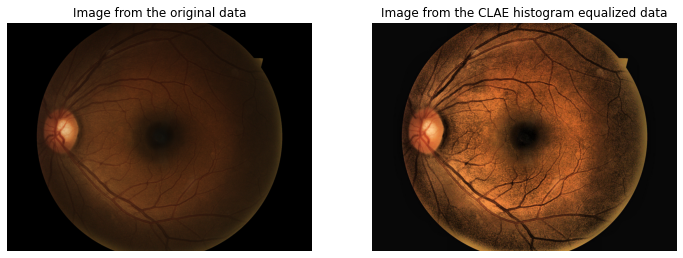

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
dataset_img = mpimg.imread("dataset/84_left.jpeg") # checking for 1st image of datset
plt.imshow(dataset_img)
plt.title("Image from the original data")
plt.axis(False)

plt.subplot(1,2,2)
data_img = mpimg.imread("data/84_left.jpeg")
plt.imshow(data_img)
plt.title("Image from the CLAE histogram equalized data")
plt.axis(False)

Hence the equalization worked. 

In [ ]:
# Confirming the extraction of all files by checking the lenth of both directories
len(os.listdir("dataset/")) == len(os.listdir("data/")) 

True

Viewing our images above, it's looks like there is much spaces on the left and right side of the images, let's crop the images by 7% from the left and right side of all the images (keeping the height intact) to have a better images. 

In [ ]:
def cropped_img(folder_name="data/"):
    list_file = os.listdir(folder_name)
    for i in list_file:
        img = mpimg.imread(folder_name+i)
        cropped_img = img[:,int(img.shape[1]*0.07):int(img.shape[1]*0.93)]
        mpimg.imsave("crop_image/"+i,cropped_img)

In [ ]:
cropped_img()

Let's look for one cropped image and comapre it from the original one.

Text(0.5, 1.0, 'Cropped Image')

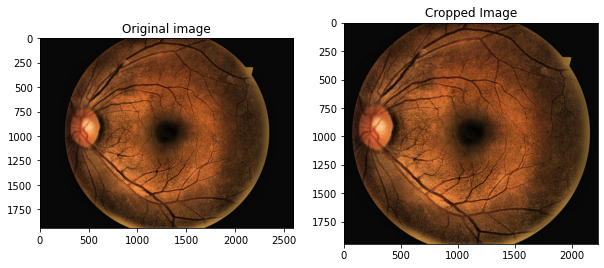

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
img = mpimg.imread("data/84_left.jpeg") # grabbing the first image 
plt.imshow(img)
plt.title("Original image")

plt.subplot(1,2,2)
img= mpimg.imread("crop_image/84_left.jpeg")
plt.imshow(img)
plt.title("Cropped Image")

Next we will check for the presence of noise. For this we will take the help of openCV `fastNlMeansDenoisingColored` inbuilt function. This function is used to remove noise from color images.  

Let's make a function by taking different hyper parameters and then which parameter works best for noise removal. This function will select one random image and compare it from five different noise removed images.  

In [ ]:
def random_image_view(target_folder = "crop_image/"):
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    
    # Let's see which parameter works best
    noisy_image = cv2.imread(target_folder + random_image[0])
    
    denoise_1 = cv2.fastNlMeansDenoisingColored(noisy_image,None,3,3,7,21) 
    denoise_2 = cv2.fastNlMeansDenoisingColored(noisy_image,None,5,5,7,21)
    denoise_3 = cv2.fastNlMeansDenoisingColored(noisy_image,None,10,10,7,21)
    denoise_4 = cv2.fastNlMeansDenoisingColored(noisy_image,None,12,12,7,21)
    denoise_5 = cv2.fastNlMeansDenoisingColored(noisy_image,None,15,15,7,21)
    
    
    # Convert it into RGB format 
    denoise_1 = cv2.cvtColor(denoise_1,cv2.COLOR_BGR2RGB) 
    denoise_2 = cv2.cvtColor(denoise_2,cv2.COLOR_BGR2RGB)
    denoise_3 = cv2.cvtColor(denoise_3,cv2.COLOR_BGR2RGB)
    denoise_4 = cv2.cvtColor(denoise_4,cv2.COLOR_BGR2RGB)
    denoise_5 = cv2.cvtColor(denoise_5,cv2.COLOR_BGR2RGB)
     
    # Read in the image    
    org_img = mpimg.imread(target_folder + random_image[0])
    
    
    plt.figure(figsize=(16,9))

    plt.subplot(2,3,1)
    plt.imshow(org_img)
    plt.title("Original")
    plt.axis(False)

    plt.subplot(2,3,2)
    plt.imshow(denoise_1)
    plt.title("Removed noise_1")
    plt.axis(False)

    plt.subplot(2,3,3)
    plt.imshow(denoise_2)
    plt.title("Removed noise_2")
    plt.axis(False)


    plt.subplot(2,3,4)
    plt.imshow(denoise_3)
    plt.title("Removed noise_3")
    plt.axis(False)
    
    plt.subplot(2,3,5)
    plt.imshow(denoise_3)
    plt.title("Removed noise_4")
    plt.axis(False)
    
    plt.subplot(2,3,6)
    plt.imshow(denoise_3)
    plt.title("Removed noise_5")
    plt.axis(False)
    

    return org_img,denoise_1,denoise_2,denoise_3,denoise_4,denoise_5

['9511_left.jpeg']


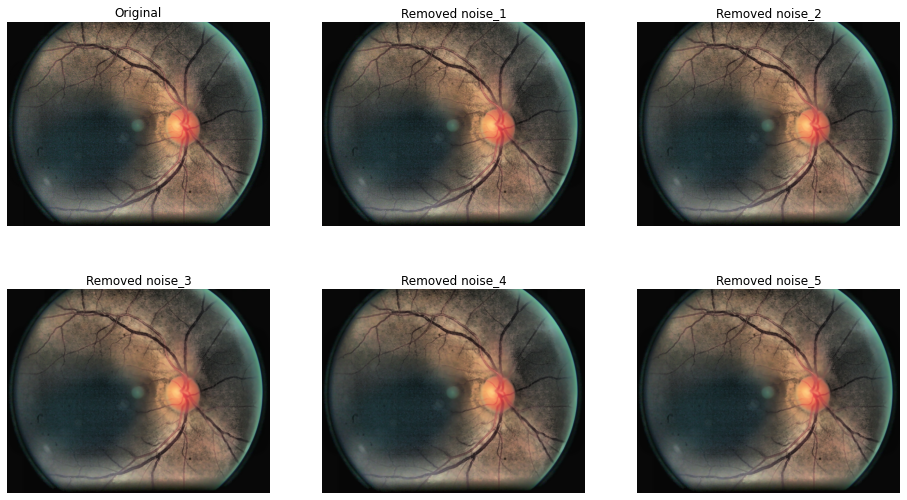

In [ ]:
import random
img_view = random_image_view()

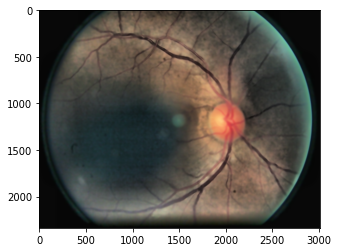

In [ ]:
# Modifying the factors 
img_r = cv2.imread("crop_image/9511_left.jpeg")
denoise_6 = cv2.fastNlMeansDenoisingColored(img_r,None,25,25,25,25)
denoise_6 = cv2.cvtColor(denoise_6,cv2.COLOR_BGR2RGB)
plt.imshow(denoise_6)

Looks like there is not much effect of noise removal. So, we will continue with our original CLAHE cropped image.

There is also a .csv file in the dataset that contians the label names of the images. Let's export this to colab.  

In [ ]:
df_retina = pd.read_csv("trainLabels.csv")

In [ ]:
df_retina.head()

,image,level
0,84_left,0
1,84_right,0
2,95_left,0
3,95_right,0
4,99_left,3


In [ ]:
# Checking for labels
df_retina["level"].value_counts()

0    1016
2     230
1     113
4      36
3      32
Name: level, dtype: int64

Since we need to claasify the image by reading the *level* from the .csv dataset and our images are in different folder. So, we could build the model using <b> flow_from_dataframe </b> function of tensorflow. To use this function, image name should be same as the name in dataframe including the extension of file. Since the dataset doesn't conatain the extension we need to append the extension. For this, we will make a function.

In [ ]:
def append_extension(file):
    return file + ".jpeg"

In [ ]:
df_retina["image"]= df_retina["image"].apply(append_extension)

In [ ]:
df_retina.head()

,image,level
0,84_left.jpeg,0
1,84_right.jpeg,0
2,95_left.jpeg,0
3,95_right.jpeg,0
4,99_left.jpeg,3


Now we have got the same name in the dataframe as in of our directories. 

### 2. Augment the dataset and split it into training and test sets
Augementing the dataset is one of the common ways to increasse the training data on fly. We can zoom in, zoom out, flip the data horizontally and vertically, rotate the data by some angle and also normalize it by rescaling. 

We can use `tf.keras.preprocessing.image.ImageDataGenerator` function of tensorflow to make the data augemntation. Data augmentation also helps in preventing overfitting of data. And as we know in case of deep learnig, it requires a lot of data, image augmentation helps a lot.     

In [ ]:
# Augmenting the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0,  # normalizing and converting imaegs into float
                                    rotation_range=0.2, # rotate the image randomly by 0 to 20%.
                                         shear_range = 0.2, # shear the image by 20%
                                         zoom_range=0.2, # zoom-in and zoom-out by 20%
                                         width_shift_range=0.2,  # shift the image along X-axis by 20%
                                         height_shift_range=0.3, # shift the image along y-axis by 30%
                                         horizontal_flip=True, # provides mirror reflection
                                         validation_split=0.25) # split the dataset into 75-25 ratio

In [ ]:
# Defining the training data
train_data = train_datagen.flow_from_dataframe(dataframe=df_retina, # name of dataframe containing data 
                                            directory="crop_image/", # name of directory where images are stored
                                            x_col="image",  # column name in dataframe containing image name 
                                            y_col="level", # column name in dataframe containing labels name
                                            subset="training", # this keyword "subset=training" differentiate it from validation dataset
                                            seed=42,  # for reproducibility
                                            shuffle=True,
                                            class_mode="raw",  # numpy array of values in y_col column(s)
                                            batch_size = 32, # defining the batch size
                                            target_size=(224,224)) 

Found 1070 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
# Defining the test data
validation_data = train_datagen.flow_from_dataframe(dataframe=df_retina,
                                                      directory="crop_image/",
                                                      x_col="image",
                                                      y_col="level",  
                                                      subset="validation", # this keyword "subset=validation" differentiate it from training dataset
                                                      seed=42,
                                                      shuffle=True,
                                                      class_mode="raw",
                                                      batch_size = 32, # defining the batch size
                                                      target_size=(224,224))

Found 356 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
len(train_data),len(validation_data)

(34, 12)

### 3 & 4. Define the distributed training strategy and number of shared instances.
In distributed training strategy, training is divided between multiple machines or GPUs, to greatly reduce the training time. Here we will perform Mirrored Strategy. We need to define the hyperparameters and initialize the distributed learning system.    

In [ ]:
#Initializing the distributed learning algorithm
strategy = tf.distribute.MirroredStrategy()
print(f"Devices: {strategy.num_replicas_in_sync}")

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Devices: 1


### 5 & 6. Define a CNN architecture to extract features from the model data and define parameters like the loss, optimizer, epochs, learning rate, and evaluation metric

In [ ]:
with strategy.scope():
  model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32,3,padding="same",activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.3),
    
    
    tf.keras.layers.Conv2D(128,3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(128,3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(128,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5,activation="softmax")
    ])
  # compile the model
  model_1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


### 7. Define the callbacks
Next task is to define the checkpoint directory to store the checkpoints and then define the name of the checkpoint files. 

There are many callbacks are available with Keras, like `EarlyStopping`, which becomes really helpful when we are training for large number of epochs and want to stop training when there is no improvement in provided metrics. Similarly there are other callbacks like ReduceLROnPlateau , LearningRateScheduler, ModelChekpoint etc. 

Here we will use `LearningRateScheduler` which allows us to vary learning rate according to number of epochs. And other is `ModelChekpoint`, which allow us to save the model after every epoch, and also allows to save those weights only where model has performed best. 

In [ ]:
# Define the checkpoint directory to store the checkpoints
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files.
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

Next as discussed above we will design a learning rate according to epochs. Below we will make a funtion where for epoch of 1 & 2, learning rate would be default i.e. 0.001, then between 3 and 6 (including both), learning rate would decreased to 0.0001  and further below it would 0.00001.    

In [ ]:
# Defining a function for decaying the learning rate
def decay(epoch):
  if epoch < 3:
    return 1e-3   # for epoch less than 3, learning rate is 0.001
  elif epoch >= 3 and epoch < 7:
    return 1e-4    # for epoch from 3 to 7, learning rate is 0.0001
  else:
    return 1e-5 # from epoch 7, learning rate is 0.00001

Next we will  write a function that will print learning rate at the end of each epoch and then define the callbacks.

In [ ]:
class PrintLR(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    print('\nLearning rate for epoch {} is {}'.format(epoch + 1,
                                                      model_1.optimizer.lr.numpy()))


callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,
                                       save_weights_only=True),
    tf.keras.callbacks.LearningRateScheduler(decay),
    PrintLR()
]



### 8. Train the model.

Befor fitting the model, let's make a function that will print the train and validation accuracy and loss. 

In [ ]:
def plot_loss_curves(history):
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) # how many epochs did we run for
    
    # PLot loss
    plt.plot(epochs,loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [ ]:
# Print the summary of the model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 64)      18496     
                                                      

Here in above trainable and non-trainabale means, layers that could be trained. Here all layers are trainable. Non-trainable parameters are availabel with us generally in case of transfer learning, where we have frozen the layers, hence they are not trainable.   

Now fit the model for 10 epochs. 

In [ ]:
# Train the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch = len(train_data),
                        validation_data= validation_data,
                        validation_steps = len(validation_data),
                        callbacks = callbacks)

Epoch 1/10
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
34/34 [==============================] - ETA: 0s - loss: 1.0721 - accuracy: 0.6860
Learning rate for epoch 1 is 0.0010000000474974513
34/34 [==============================] - 191s 5s/step - loss: 1.0721 - accuracy: 0.6860 - val_loss: 0.8429 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 2/10
34/34 [==============================] - ETA: 0s - loss: 1.0049 - accuracy: 0.6972
Learning rate for epoch 2 is 0.0010000000474974513
34/34 [==============================] - 172s 5s/step - loss: 1.0049 - accuracy: 0.6972 - val_loss: 0.8714 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 3/10
34/34 [==============================] - ETA: 0s - loss: 0.9781 - accuracy: 0.6972
Learning rate for epoch 3 is 0.0010000000474974513

Load the weights from the checkpoints and evaluate the model.

In [ ]:
model_1.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

eval_loss, eval_acc = model_1.evaluate(validation_data)

print('Eval loss: {}, Eval accuracy: {}'.format(eval_loss, eval_acc))

12/12 [==============================] - 52s 4s/step - loss: 0.8202 - accuracy: 0.7584
Eval loss: 0.8202410340309143, Eval accuracy: 0.7584269642829895


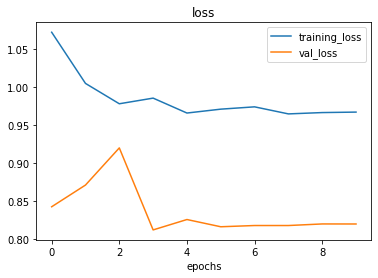

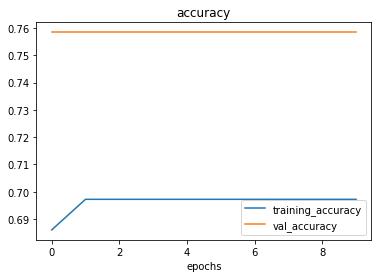

In [ ]:
# PLotting the loss and accuracy
plot_loss_curves(history_1)

Accuracy here hasn't been improved after 1st epoch, though after tring many combination in realistic time approach, this is the best accuracy got. 

Though we could have increase the accuracy using transfer learning models like ImageNet, EfficientNet etc. But our purpose was to apply the CNN by ourself.   

In [ ]:
# Check the checkpoint directory.
!ls {checkpoint_dir}

checkpoint		     ckpt_5.data-00000-of-00001
ckpt_10.data-00000-of-00001  ckpt_5.index
ckpt_10.index		     ckpt_6.data-00000-of-00001
ckpt_1.data-00000-of-00001   ckpt_6.index
ckpt_1.index		     ckpt_7.data-00000-of-00001
ckpt_2.data-00000-of-00001   ckpt_7.index
ckpt_2.index		     ckpt_8.data-00000-of-00001
ckpt_3.data-00000-of-00001   ckpt_8.index
ckpt_3.index		     ckpt_9.data-00000-of-00001
ckpt_4.data-00000-of-00001   ckpt_9.index
ckpt_4.index


This was the end of the above model. For further we could have gone ahead by deploying the model using TensorFlow serving by saving the model using .save method. As for deploying Tensorflow recommend model in simple saving format not in .h5 format. But we will keep this file to implementing CNN and making ready data for CNN by image processing through openCV.   